# サポートベクターマシン&カーネルについて

<Figure size 640x480 with 0 Axes>

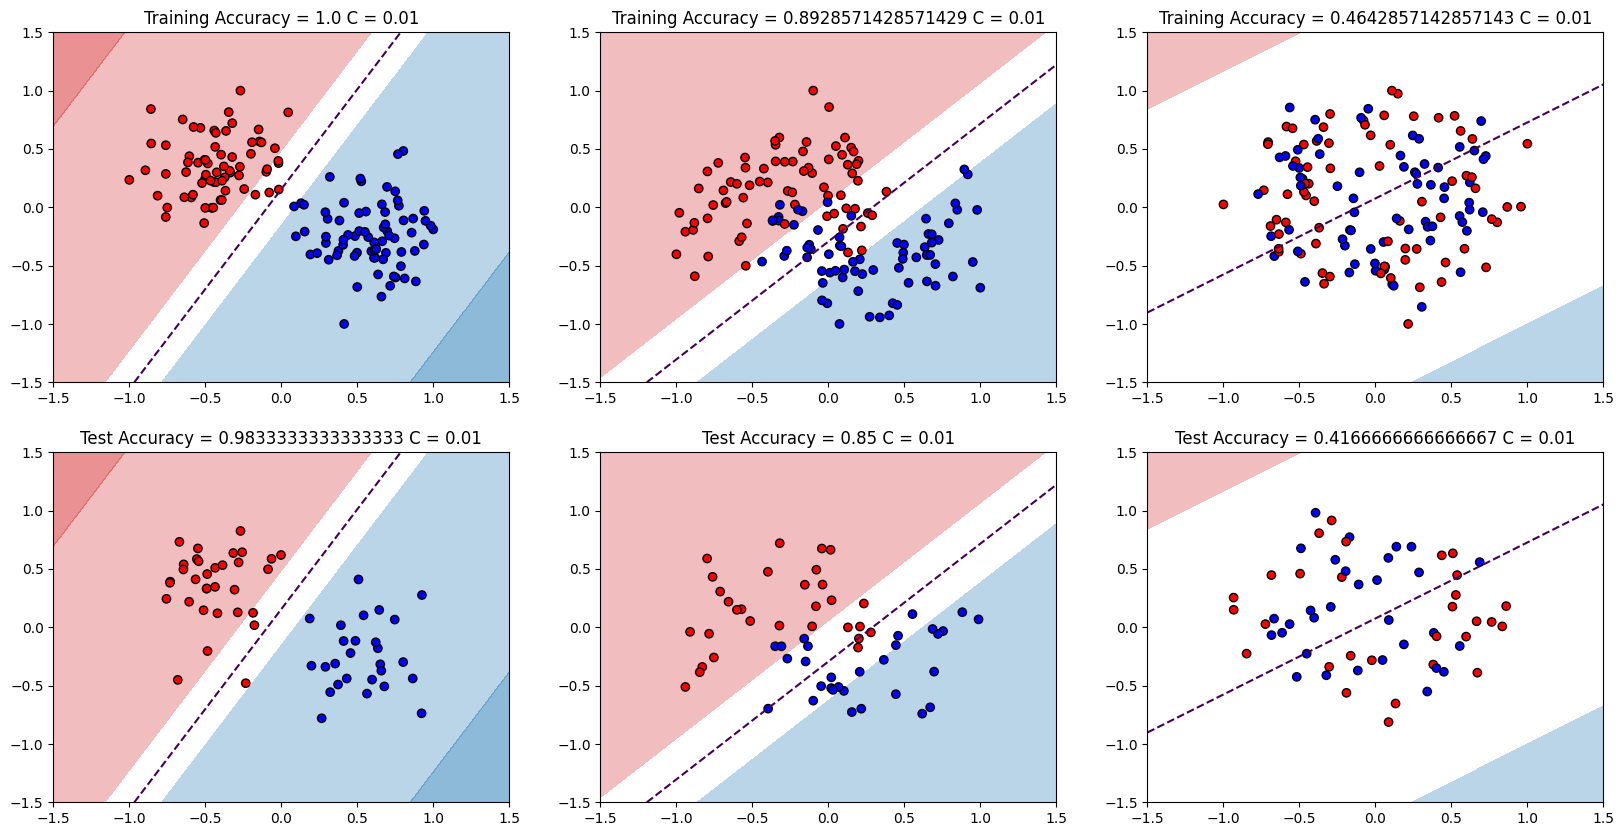

<Figure size 640x480 with 0 Axes>

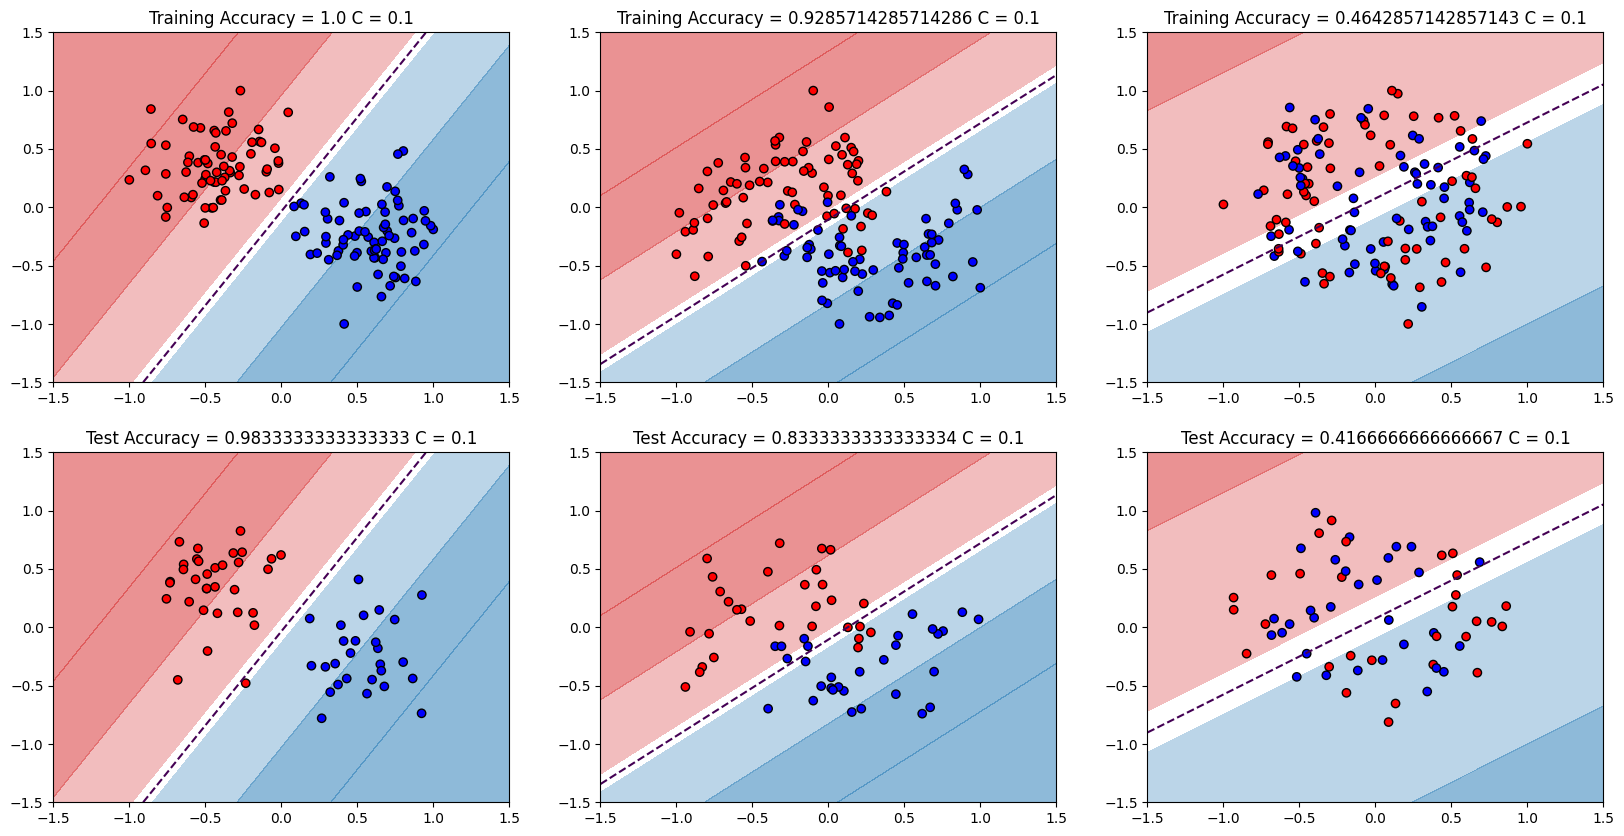

<Figure size 640x480 with 0 Axes>

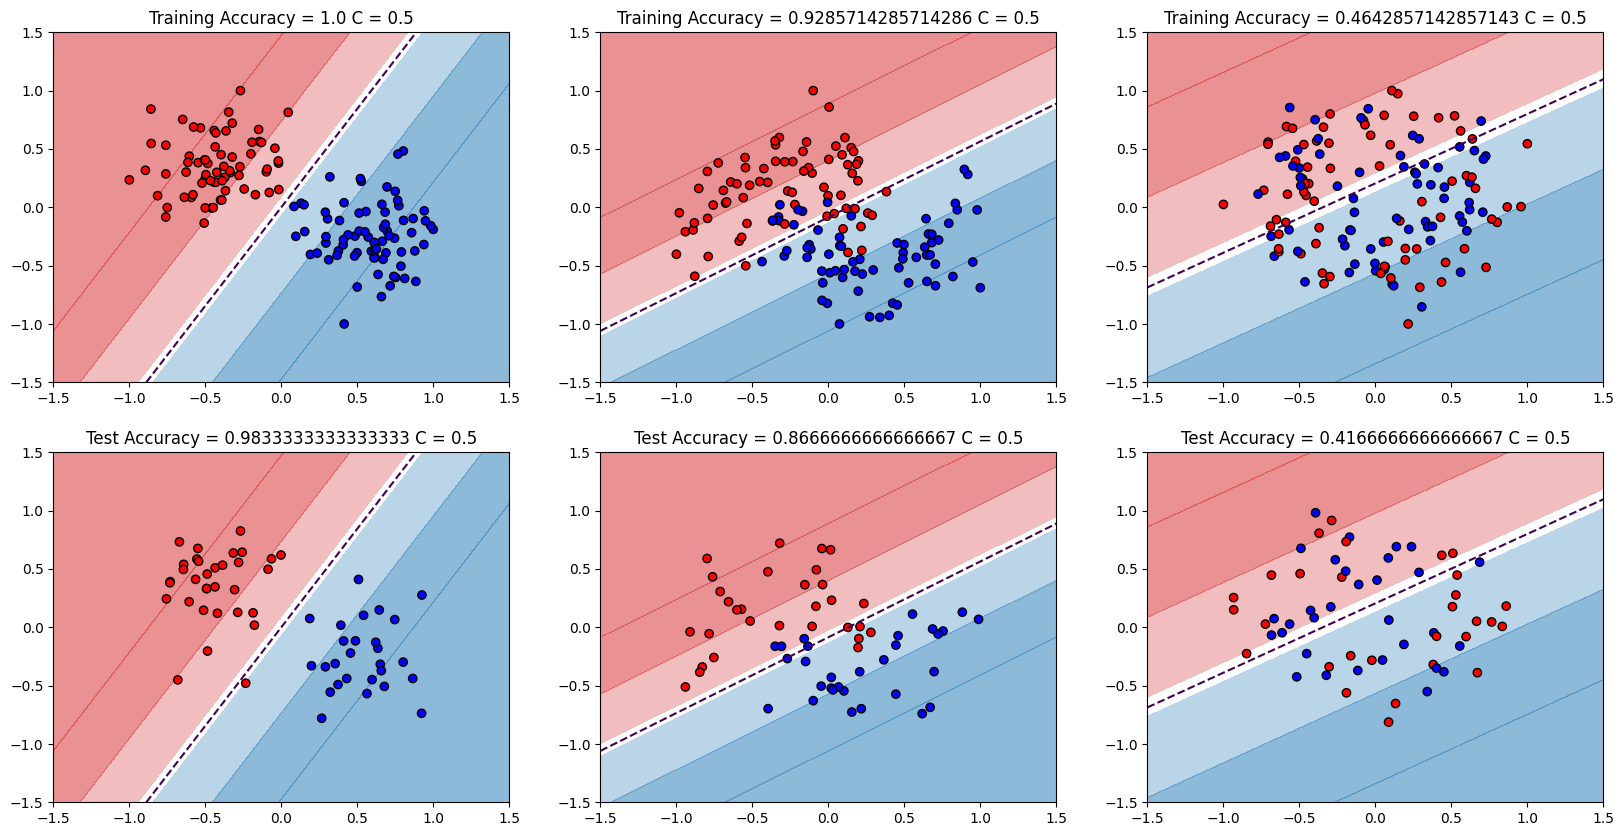

<Figure size 640x480 with 0 Axes>

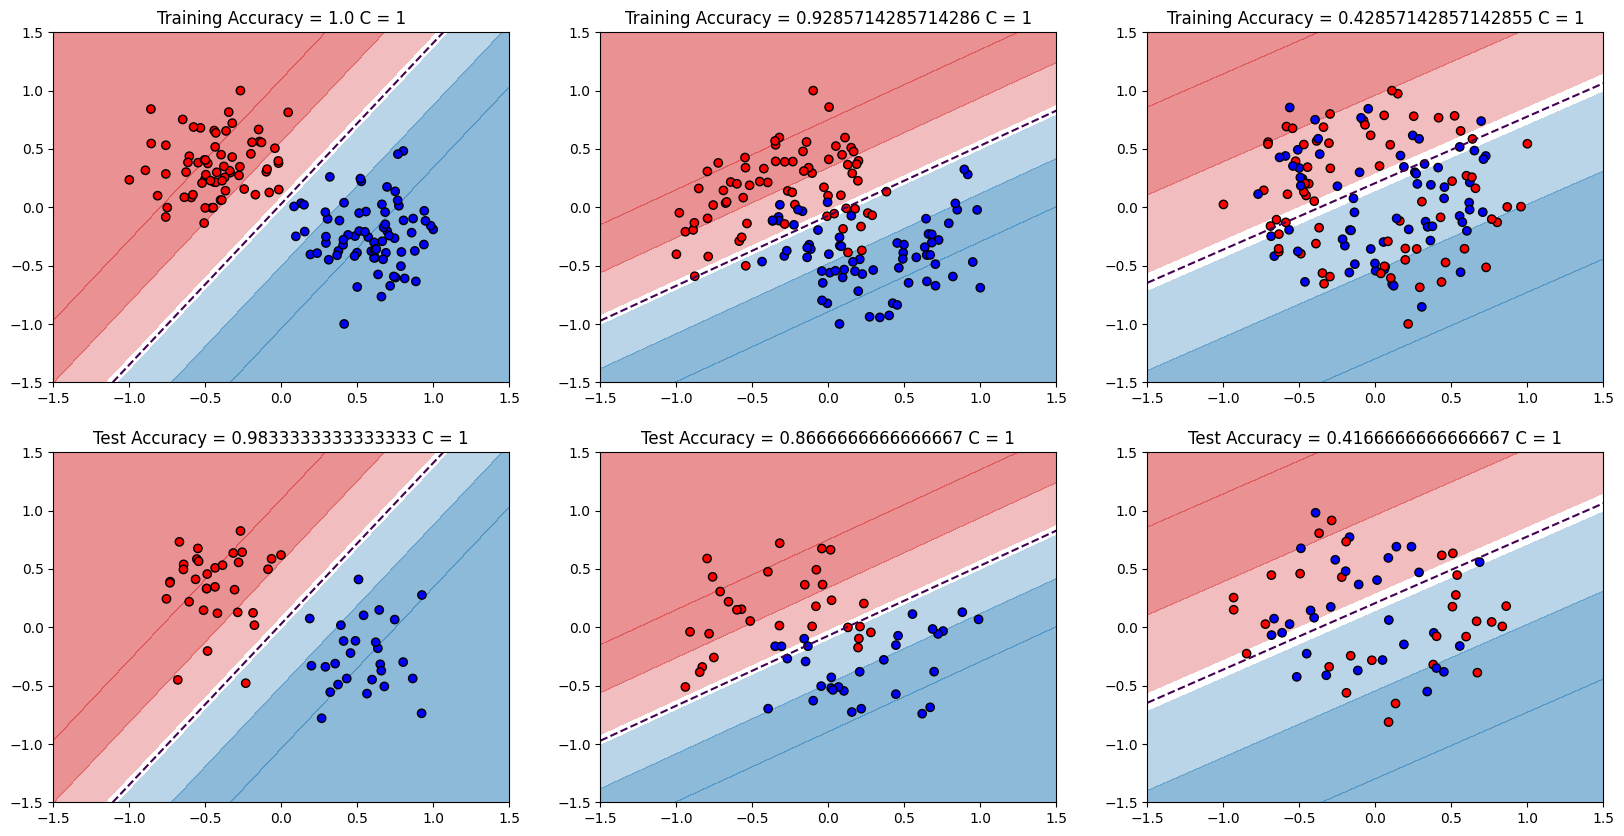

<Figure size 640x480 with 0 Axes>

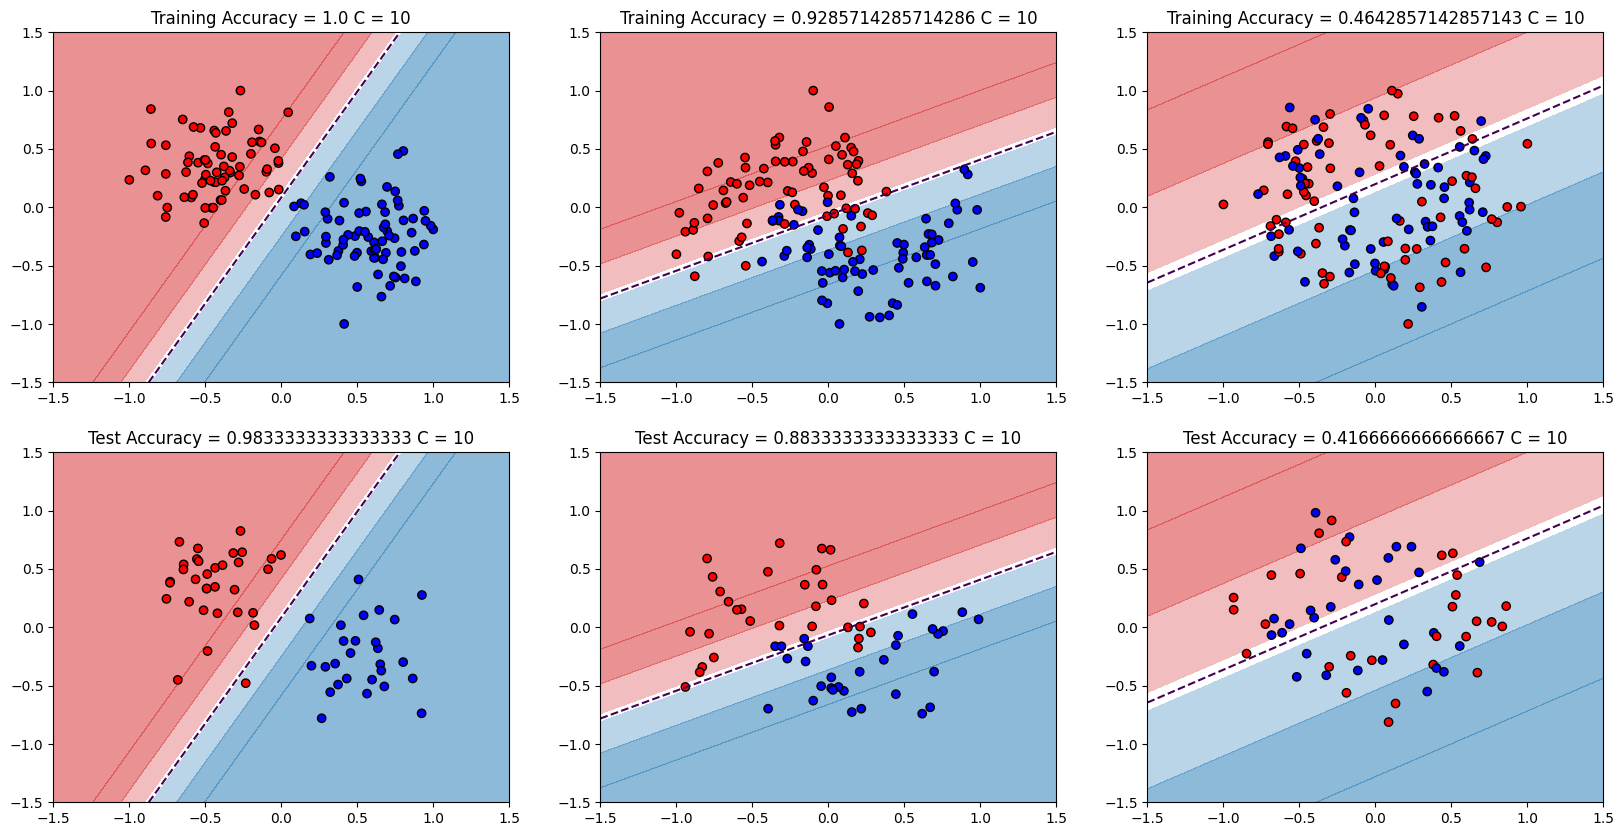

<Figure size 640x480 with 0 Axes>

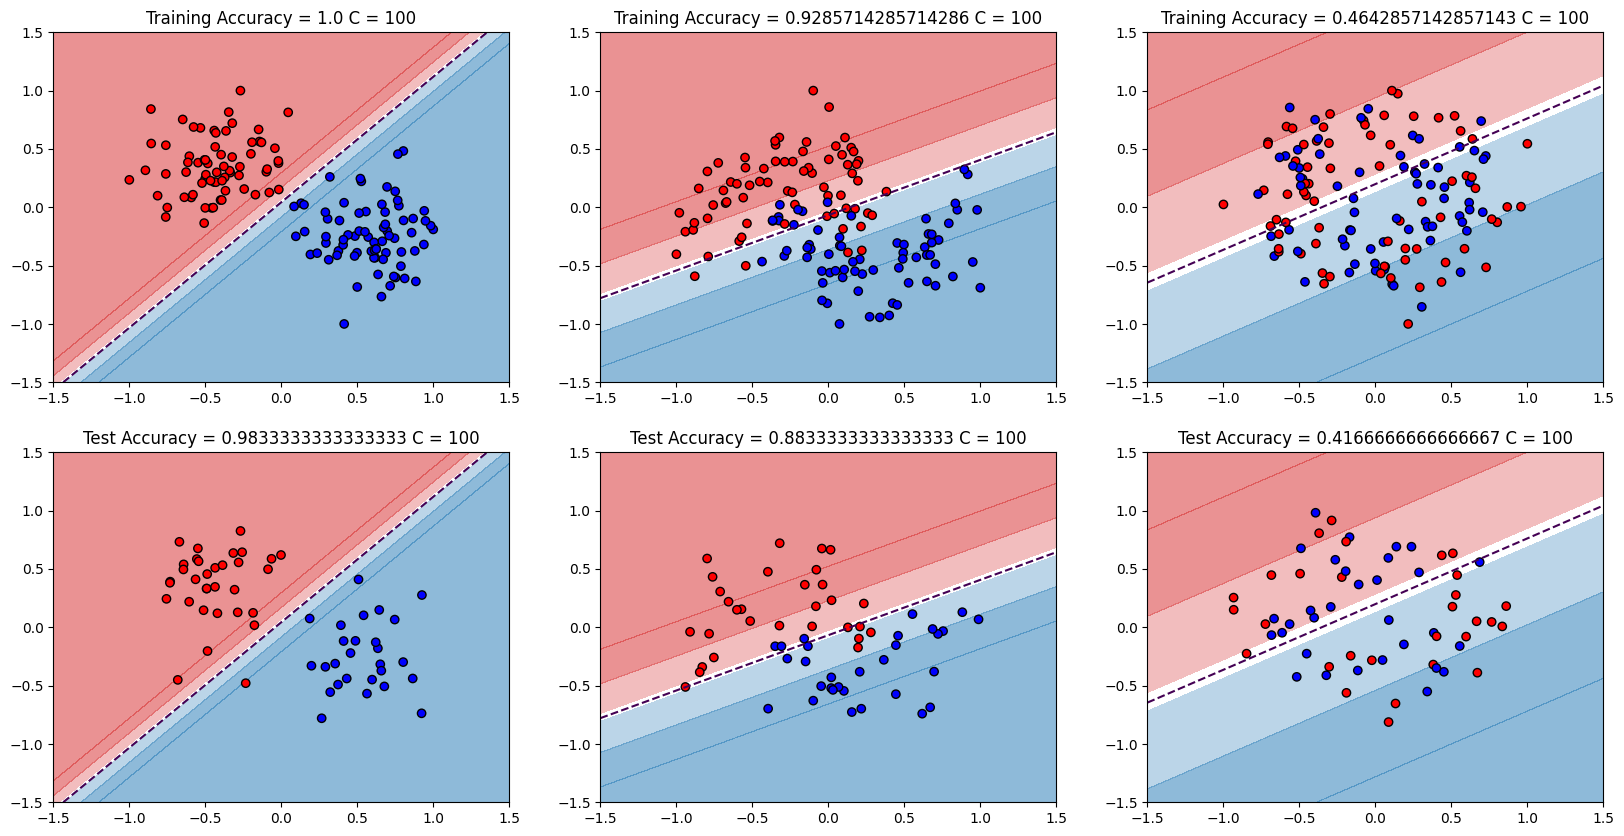

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from sklearn import svm,metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles,make_moons,make_blobs

datanames = ['linear_separation','moons','circles']
samples = 200
c_values = [0.01,0.1,0.5,1,10,100]
# 3種類のデータ作成
def datasets(dataname):
    if dataname == 'linear_separation':
        X,y = make_blobs(n_samples=samples,centers=2,random_state=64)
    elif dataname == 'moons':
        X,y = make_moons(n_samples=samples,noise=0.3,random_state=74)
    elif dataname == 'circles':
        X,y = make_circles(n_samples=samples,noise=0.3,random_state=70)

    X = preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(X)
    return X,y
# Cとデータセットごとに分類を行う
def learn_test_plot(clf_models):
    for clf in clf_models:
        plt.clf()
        # 3種類のデータごとにTrain ErrorとTest Errorを描画（計6種類）
        fig = plt.figure(figsize=(20,10))
        ax = [fig.add_subplot(2,3,i+1) for i in range(6)]
        for a in ax:
            a.set_xlim(-1.5,1.5)
            a.set_ylim(-1.5,1.5)

        for dataname in datanames:
            X,y = datasets(dataname)
            X_tr_val,X_test,y_tr_val,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
            X_tr,X_val,y_tr,y_val = train_test_split(X_tr_val,y_tr_val,test_size=0.2,random_state=42)
            clf.fit(X_tr,y_tr)
            dec = clf.decision_function(X_val)
            predict = clf.predict(X_val)
            train_acc = metrics.accuracy_score(y_val,predict)
            test_predict = clf.predict(X_test)
            test_acc = metrics.accuracy_score(y_test,test_predict)
            c_value = clf.get_params()['C']
            # メッシュデータ
            xlim = [-1.5,1.5]
            ylim = [-1.5,1.5]
            xx = np.linspace(xlim[0], xlim[1], 30)
            yy = np.linspace(ylim[0], ylim[1], 30)
            YY, XX = np.meshgrid(yy, xx)
            xy = np.vstack([XX.ravel(), YY.ravel()]).T
            Z = clf.decision_function(xy).reshape(XX.shape)
            # 塗りつぶし用の色
            blue_rgb = mcolors.to_rgb("tab:blue")
            red_rgb = mcolors.to_rgb("tab:red")
            # データセットごとに縦に並べる
            index = datanames.index(dataname)
            # decision_functionが大きいほど色を濃くする
            ax[index].contourf(XX, YY, Z,levels=[-2,-1,-0.1,0.1,1,2],colors=[red_rgb+(0.5,),red_rgb+(0.3,),(1,1,1),blue_rgb+(0.3,),blue_rgb+(0.5,)],extend='both')
            ax[index].contour(XX,YY,Z,levels=[0],linestyles=["--"])
            ax[index].scatter(X_tr_val[:,0],X_tr_val[:,1],c=y_tr_val,edgecolors='k',cmap=ListedColormap(['#FF0000','#0000FF']))
            ax[index].set_title(f"Training Accuracy = {train_acc} C = {c_value}")

            ax[index+3].contourf(XX, YY, Z,levels=[-2,-1,-0.1,0.1,1,2],colors=[red_rgb+(0.5,),red_rgb+(0.3,),(1,1,1),blue_rgb+(0.3,),blue_rgb+(0.5,)],extend='both')
            ax[index+3].contour(XX,YY,Z,levels=[0],linestyles=["--"])
            ax[index+3].scatter(X_test[:,0],X_test[:,1],c=y_test,edgecolors='k',cmap=ListedColormap(['#FF0000','#0000FF']))
            ax[index+3].set_title(f"Test Accuracy = {test_acc} C = {c_value}")
        plt.show()
        plt.clf()

clf_models = [svm.SVC(kernel='linear',C=c_value) for c_value in c_values]
learn_test_plot(clf_models)

3種類（分布）のデータを用意しました。

1. Linear Separation: blobsにより作成した点の集合、綺麗に分類できる

2. moons: 三日月が２つ合わさった形の分布（境界線では交えてて、線形で綺麗に分割できない）

3. circles: 円が２つ重なった状態。どうやっても線形では分類できない


この場合、単純なsvmではCの値を変えても分類の傾向はそんなに変わりません。

<Figure size 640x480 with 0 Axes>

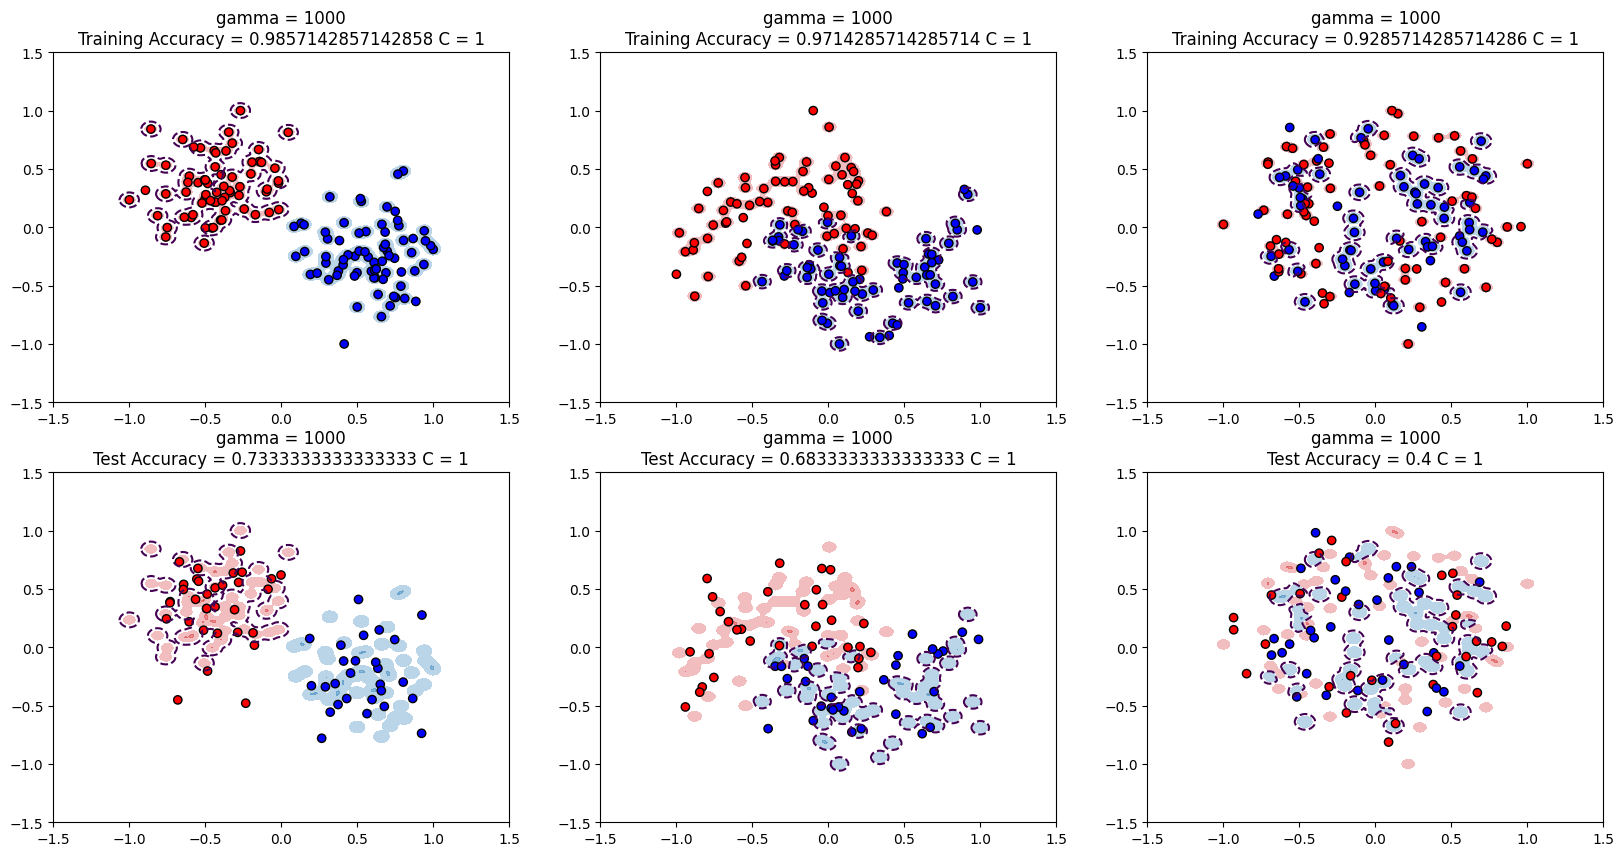

<Figure size 640x480 with 0 Axes>

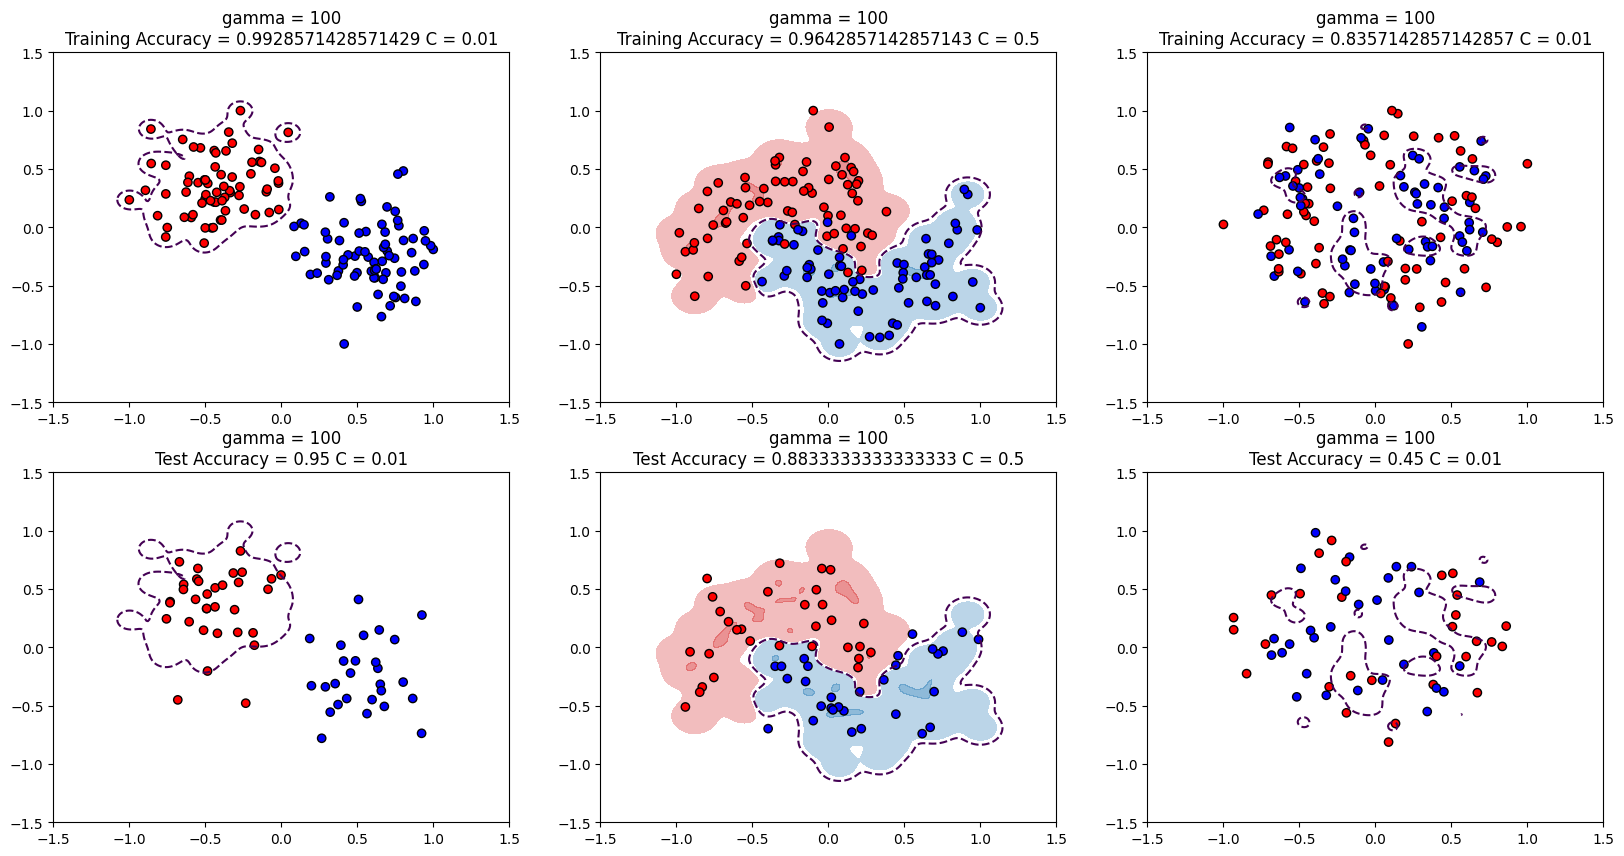

<Figure size 640x480 with 0 Axes>

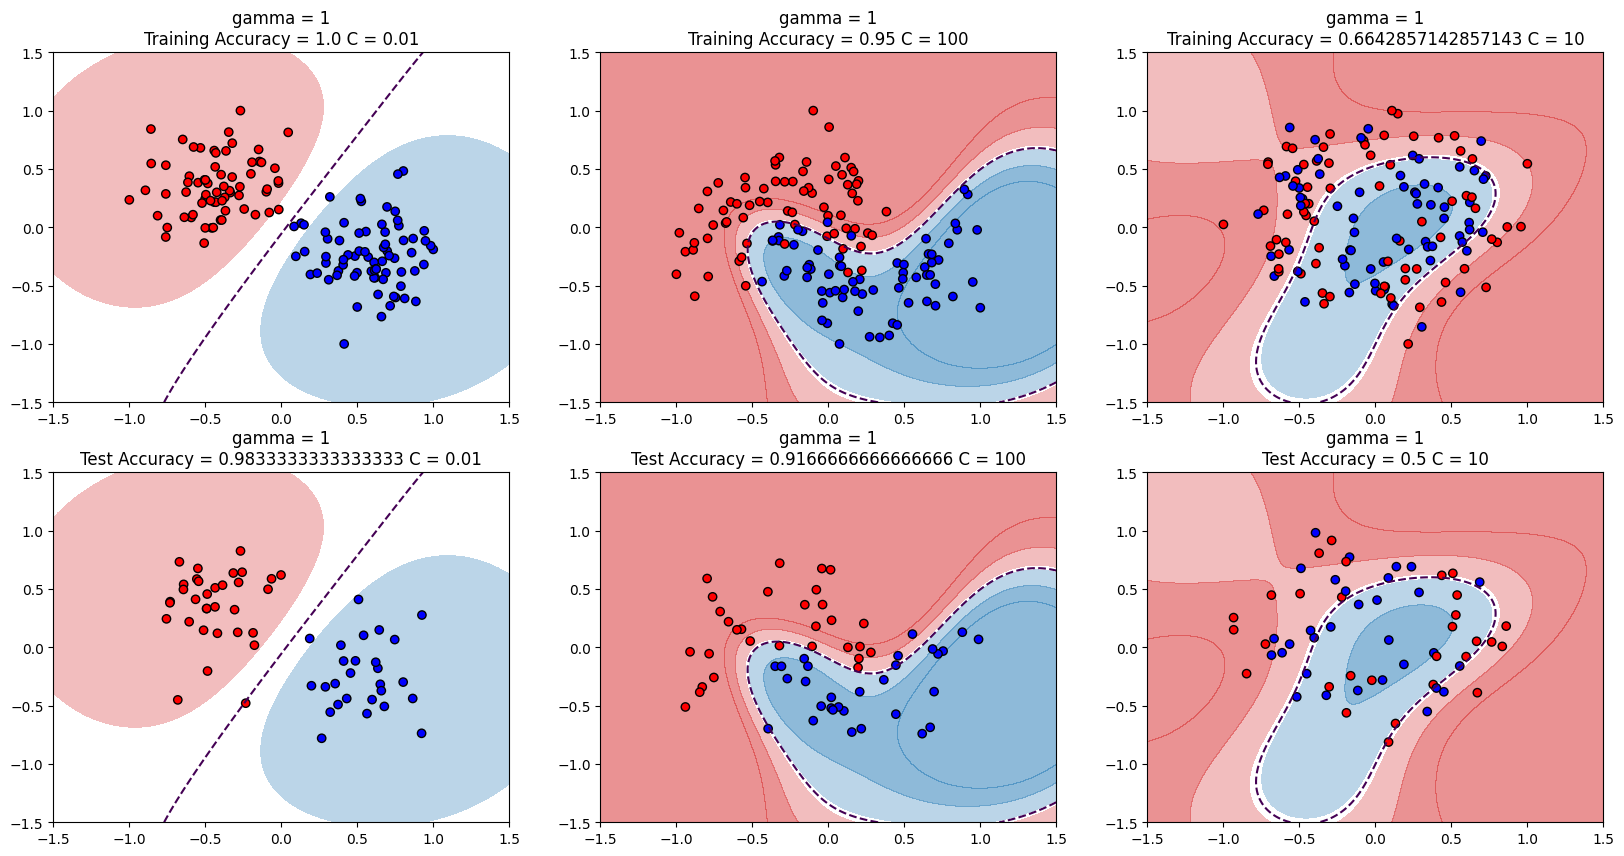

<Figure size 640x480 with 0 Axes>

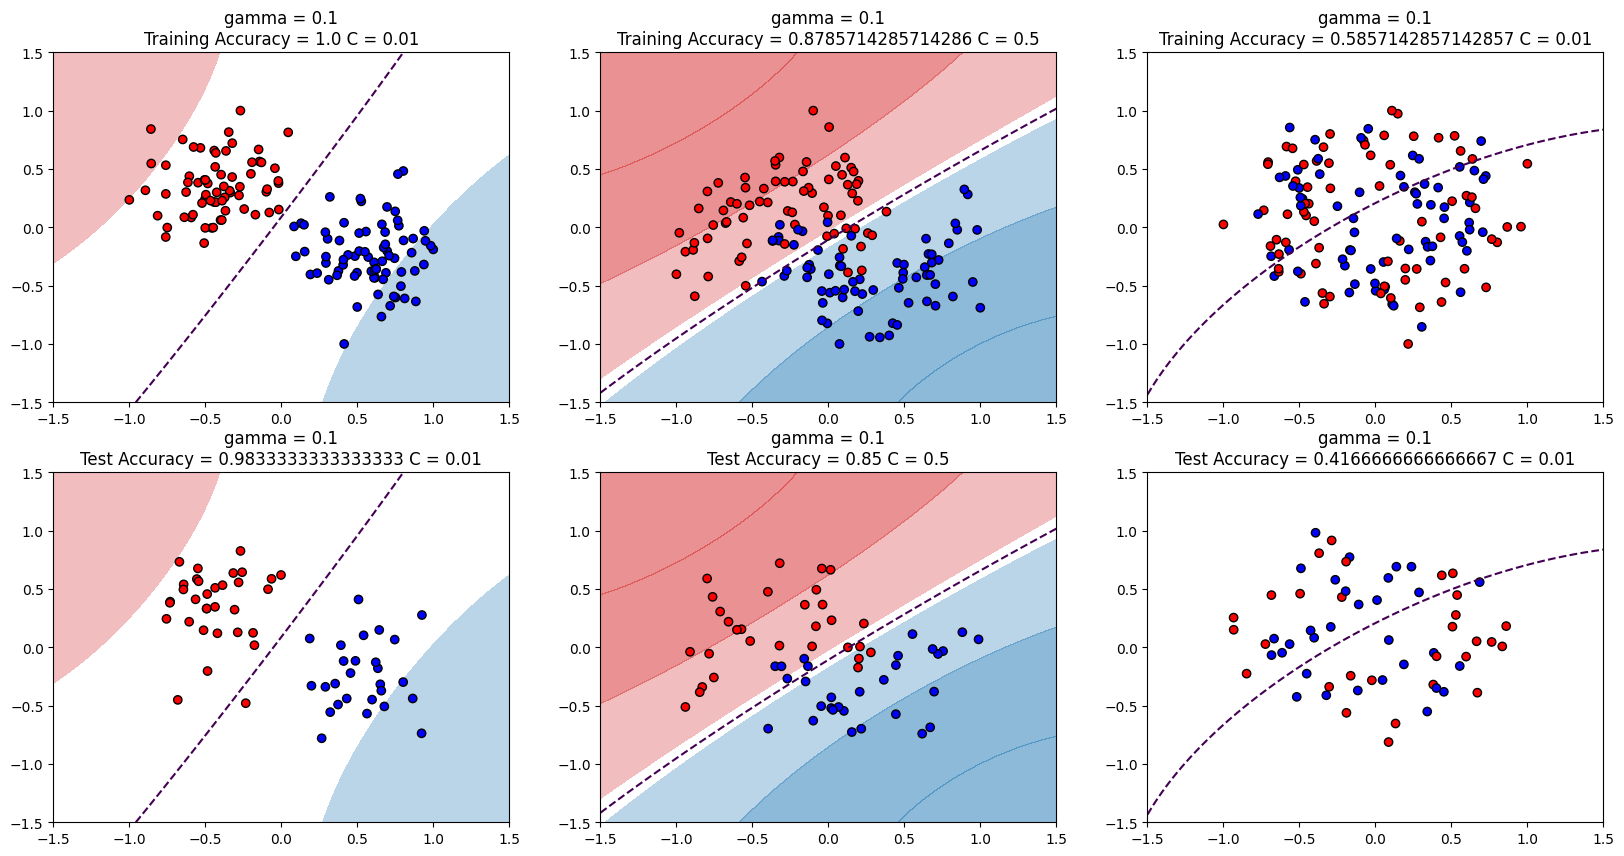

<Figure size 640x480 with 0 Axes>

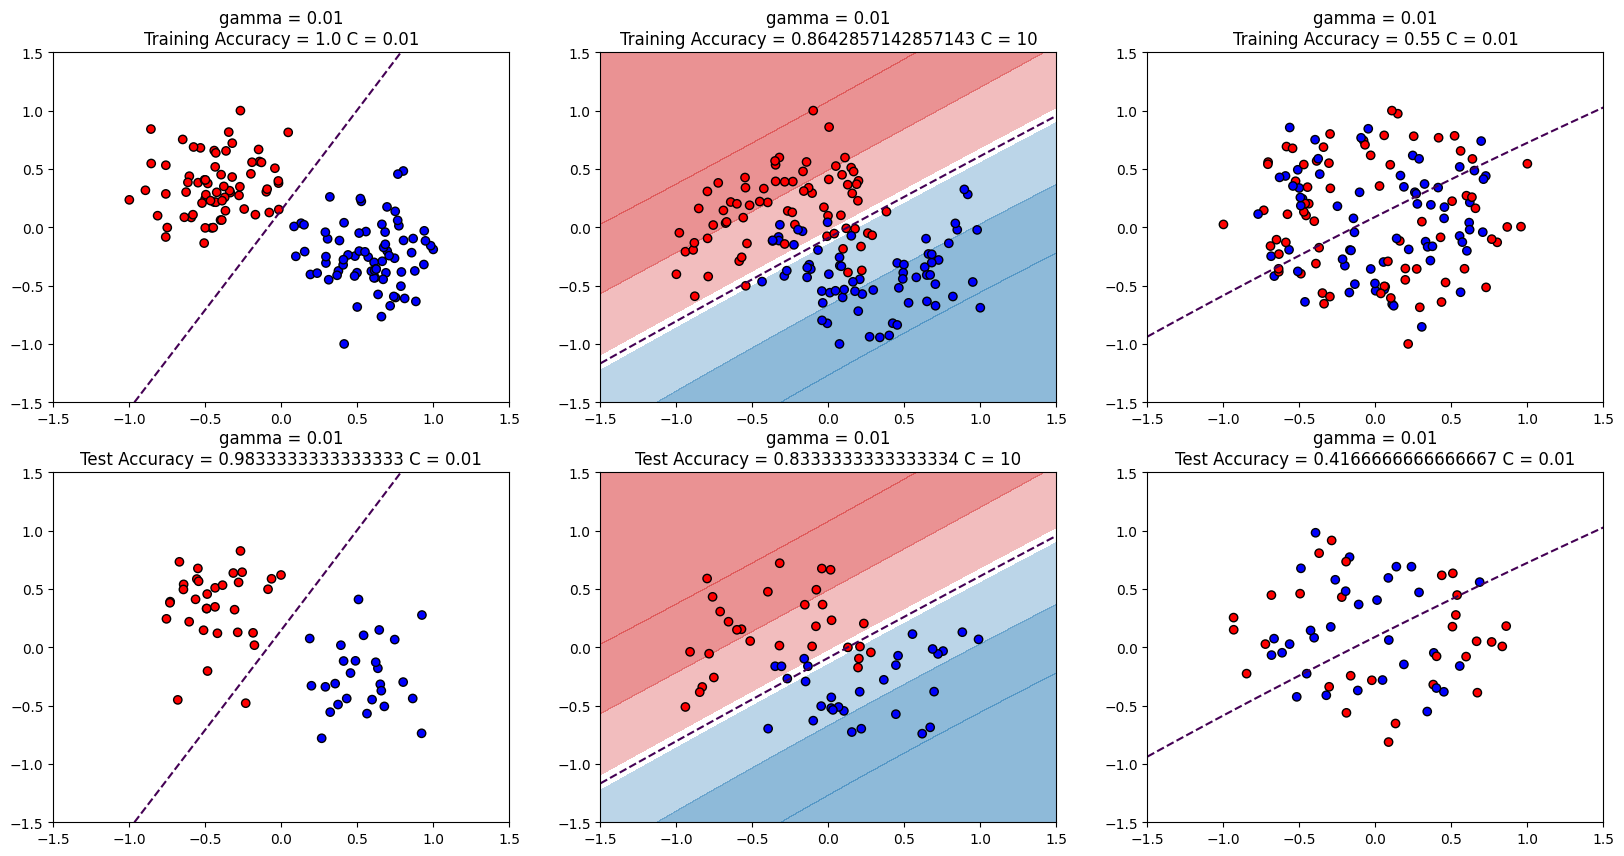

<Figure size 640x480 with 0 Axes>

In [4]:
def learn_test_plot(clf_models):
    accs = {}
    for clf in clf_models:
        for dataname in datanames:
            if dataname not in accs:
                accs[dataname] = []
            X,y = datasets(dataname)
            X_tr_val,X_test,y_tr_val,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
            X_tr,X_val,y_tr,y_val = train_test_split(X_tr_val,y_tr_val,test_size=0.2,random_state=42)
            clf.fit(X_tr,y_tr)
            predict = clf.predict(X_val)
            train_acc = metrics.accuracy_score(y_val,predict)
            accs[dataname].append(train_acc)
    return accs
# gammaを動かして描画
gamma_list = [1000,100,1,0.1,0.01]
for gamma in gamma_list:
    plt.clf()
    clf_models = [svm.SVC(kernel='rbf',gamma=gamma,C=c_value) for c_value in c_values]
    accs = learn_test_plot(clf_models)
    fig = plt.figure(figsize=(20,10))
    ax = [fig.add_subplot(2,3,i+1) for i in range(6)]
    for a in ax:
        a.set_xlim(-1.5,1.5)
        a.set_ylim(-1.5,1.5)
    for dataname in datanames:
        best_c_index = np.argmax(accs[dataname])
        X,y = datasets(dataname)
        X_tr_val,X_test,y_tr_val,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
        X_tr,X_val,y_tr,y_val = train_test_split(X_tr_val,y_tr_val,test_size=0.2,random_state=42)
        clf = clf_models[best_c_index]

        clf.fit(X_tr,y_tr)
        train_predict = clf.predict(X_tr_val)
        test_predict = clf.predict(X_test)
        train_acc = metrics.accuracy_score(y_tr_val,train_predict) 
        test_acc = metrics.accuracy_score(y_test,test_predict)
        c_value = clf.get_params()['C']

        # メッシュデータ
        xlim = [-1.5,1.5]
        ylim = [-1.5,1.5]
        xx = np.linspace(xlim[0], xlim[1], 300)
        yy = np.linspace(ylim[0], ylim[1], 300)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)
        # 塗りつぶし用の色
        blue_rgb = mcolors.to_rgb("tab:blue")
        red_rgb = mcolors.to_rgb("tab:red")
        # データセットごとに縦に並べる
        index = datanames.index(dataname)
        # decision_functionが大きいほど色を濃くする
        ax[index].contourf(XX, YY, Z,levels=[-2,-1,-0.1,0.1,1,2],colors=[red_rgb+(0.5,),red_rgb+(0.3,),(1,1,1),blue_rgb+(0.3,),blue_rgb+(0.5,)],extend='both')
        ax[index].contour(XX,YY,Z,levels=[0],linestyles=["--"])
        ax[index].scatter(X_tr_val[:,0],X_tr_val[:,1],c=y_tr_val,edgecolors='k',cmap=ListedColormap(['#FF0000','#0000FF']))
        ax[index].set_title(f"gamma = {gamma}\nTraining Accuracy = {train_acc} C = {c_value}")

        ax[index+3].contourf(XX, YY, Z,levels=[-2,-1,-0.1,0.1,1,2],colors=[red_rgb+(0.5,),red_rgb+(0.3,),(1,1,1),blue_rgb+(0.3,),blue_rgb+(0.5,)],extend='both')
        ax[index+3].contour(XX,YY,Z,levels=[0],linestyles=["--"])
        ax[index+3].scatter(X_test[:,0],X_test[:,1],c=y_test,edgecolors='k',cmap=ListedColormap(['#FF0000','#0000FF']))
        ax[index+3].set_title(f"gamma = {gamma}\nTest Accuracy = {test_acc} C = {c_value}")
    plt.show()
    plt.clf()
    # (f"6.2_{gamma}.png")

learn_test_plotの関数で全てのCに対してのaccuracy_score(最もらしさを)返している。
そこから最も大きいaccuracy_scoreを返すCで描画する

gammaが大きいと訓練データの影響の直径が小さくなる = 複雑な形になる
gammaが大きい場合は決定境界は非常に複雑な形をしているが、gammaが小さいと直線になってしまっている

make_blobsで作ったデータに対して、決定境界が各訓練データにまとわりつくようにすることはほぼ意味がない（塊が２つなら）。
逆にmake_circlesのデータに対しては、直線の決定境界は意味がない。